In [5]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [6]:
class AdaBoost:
    def __init__(self, n_estimators=50, learning_rate=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self._set_trees()
    
    def _set_trees(self):
        self.trees = []
        for _ in range(self.n_estimators):
            self.trees.append(DecisionTreeClassifier(max_depth=1))
            
    def fit(self, X, Y):
        m = X.shape[0]
        w = np.full(m, 1/m)
        self.alphas = []

        for i in range(self.n_estimators):
            self.trees[i].fit(X, Y, sample_weight=w)
            Y_pred = self.trees[i].predict(X)
            err = ((Y_pred != Y) * w).sum() / w.sum()
            alpha = np.log((1-err)/err)
            w = w * np.exp(alpha * (Y_pred != Y))
            self.alphas.append(alpha)
            
    def predict(self, X,):
        self.Y_pred = 0
        
        for i in range(self.n_estimators):
            self.Y_pred += self.alphas[i] * self.trees[i].predict(X)
    
        return np.sign(self.Y_pred)

Accuracy score: 91.10000000000001%


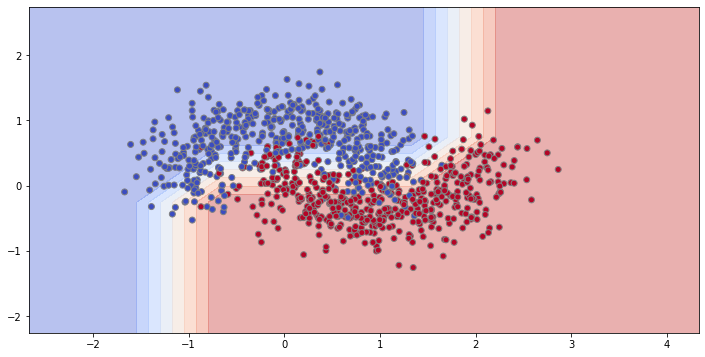

In [12]:
plt.figure(figsize=(12,6))
X, Y = make_moons(n_samples=1000, noise=0.3, random_state=42)
Y = np.where(Y==1, 1, -1)
model = AdaBoost()
model.fit(X, Y)
Y_pred = model.predict(X)
acc_score = accuracy_score(Y, Y_pred)
print(f'Accuracy score: {acc_score * 100}%')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='coolwarm', edgecolor='gray');